In [11]:
#importing packages for plotting
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
#importing packages to exstract from mysql
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
import mysql.connector as sql

Placing Tables into Dataframes
1. USA Gymnastics Individual All Around

In [13]:
#extracting table that includes allround and putting in dataframe
db_connection = sql.connect(host='127.0.0.1', database='usa_gym', user='root', password ='Blue2014!')
db_cursor = db_connection.cursor()
individual = db_cursor.execute('SELECT * FROM usagym_indiv_all_around')
# team = db_cursor.execute('se')
table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows, columns=db_cursor.column_names)
#df

In [14]:
#Extracting team final from sql and putting in data frame
team = db_cursor.execute('select * from all_gym_team_finals')
table_row = db_cursor.fetchall()
team = pd.DataFrame(table_row, columns=db_cursor.column_names)
team

,Name,NOC,ID,Category,Difficulty,Execution,Score
0,Kazuma Kaya,JPN,268,Floor,5.8,8.500,14.300
1,Kazuma Kaya,JPN,268,Pommel,6.0,8.000,14.000
2,Kazuma Kaya,JPN,268,Rings,6.1,8.066,14.166
3,Kazuma Kaya,JPN,268,Vault,5.2,9.166,14.366
4,Kenzo Shirai,JPN,269,Floor,6.8,8.133,14.933
5,Kenzo Shirai,JPN,269,Vault,5.6,9.366,14.966
6,Kenzo Shirai,JPN,269,High Bar,5.8,8.166,13.966
7,Yusuke Tanaka,JPN,270,P-Bars,5.4,6.166,11.566
8,Yusuke Tanaka,JPN,270,High Bar,6.0,8.233,14.233
9,Tanigawa Wataru,JPN,272,Floor,5.9,7.266,12.866


In [15]:
#assining individual dataframe
rus_1 = df.loc[df['ID'] == 331]
chn_1 = df.loc[df['ID']== 157]
rus_2 = df.loc[df['ID'] == 334]
chn_2 = df.loc[df['ID'] == 156]
usa = df.loc[df['ID'] == 378]
#here where finding if the competers excution is perfect what there perfect score will be
error_rus_1 = [10 + e for e in rus_1['Difficulty']]
error_chn_1 = [10 + e for e in chn_1['Difficulty']]
error_rus_2 = [10 + e for e in rus_2['Difficulty']]
error_chn_2 = [10 + e for e in chn_2['Difficulty']]
error_usa = [10 + e for e in usa['Difficulty']]
#x_axis of graph
x_axis = ['Floor', 'Pommel', 'Rings', 'Vault', 'P-bars', 'High bar']


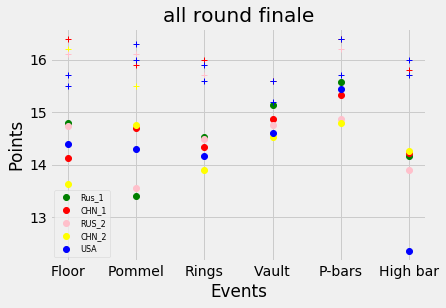

In [24]:
#plotting the competers score vs. events
fig, ax = plt.subplots()
ax.plot(x_axis, rus_1['Score'], marker='o', linewidth=0, color='green', label = "RUS_1")
ax.plot(x_axis, chn_1['Score'], marker='o', linewidth = 0, color='red', label = "CHN_1")
ax.plot(x_axis, rus_2['Score'], marker='o', linewidth = 0, color='pink', label= "RUS_2")
ax.plot(x_axis, chn_2['Score'], marker='o', linewidth = 0, color='yellow', label= "CHN_2")
ax.plot(x_axis, usa['Score'], marker='o', linewidth = 0,color='blue', label="USA")
#plotting max score vs. envents
plt.plot(x_axis, error_rus_1, marker = '+', linewidth = 0, color = 'yellow', label= "CHN Top")
plt.plot(x_axis, error_chn_1, marker = '+', linewidth = 0, color = 'pink', label = "RUS top")
plt.plot(x_axis, error_rus_2, marker = '+', linewidth = 0, color = 'red', label = "JPN Top")
plt.plot(x_axis, error_chn_2, marker = '+', linewidth = 0, color = 'blue', label = "USA Top")
plt.plot(x_axis, error_usa, marker = '+', linewidth = 0, color = 'blue', label = "USA Top")
#plotting
plt.title("all round finale")
plt.xlabel("Events")
plt.ylabel("Points")
plt.legend(["Rus_1","CHN_1", "RUS_2"
           , "CHN_2", "USA"], loc="best", prop = {'size': 8})

plt.savefig("C:/Users/laure/Desktop/Project 2/images/indvidual.png")
plt.show()

In [7]:
#including just data from events for team final
floor = team.loc[team['Category']== 'Floor'].groupby("NOC").sum()
p_bars = team.loc[team['Category'] == 'P-Bars'].groupby("NOC").sum()
rings = team.loc[team['Category'] == 'Rings'].groupby("NOC").sum()
vault = team.loc[team['Category'] == "Vault"].groupby('NOC').sum()
pommel = team.loc[team['Category'] == 'Pommel'].groupby('NOC').sum()
h_bar = team.loc[team['Category'] == 'High Bar'].groupby('NOC').sum()
#made a list Chinas score
chn = [floor.loc['CHN', 'Score'], p_bars.loc[
        'CHN','Score'], rings.loc['CHN', 'Score'], vault.loc['CHN','Score'], 
                        pommel.loc['CHN','Score'], 
                        h_bar.loc['CHN','Score']]
#made a function to make list of each countries score
def score(a):
    return [floor.loc[a, 'Score'], p_bars.loc[
        a,'Score'], rings.loc[a, 'Score'], vault.loc[a,'Score'], 
                        pommel.loc[a,'Score'], 
                        h_bar.loc[a,'Score']]
rus = score("RUS")
#Japan was not working in the function so I typed it out
jpn = ch = [floor.loc['JPN', 'Score'], p_bars.loc[
        'JPN','Score'], rings.loc['JPN', 'Score'], vault.loc['JPN','Score'], 
                        pommel.loc['JPN','Score'], 
                        h_bar.loc['JPN','Score']]
usa = score("USA")
#Funtion to find if each country does a perfect score
def top(b):
    fl = 30 + floor.loc[b, 'Difficulty']
    pb = 30 + p_bars.loc[b, 'Difficulty']
    ring = 30 + rings.loc[b, 'Difficulty']
    vaul = 30 + vault.loc[b, 'Difficulty']
    pom = 30 + pommel.loc[b, 'Difficulty']
    hb = 30 + h_bar.loc[b, 'Difficulty']
    return [fl, pb, ring, vaul, pom, hb]
    
# countries perfect score  
chn_top = top("CHN")
jpn_top = top("JPN")
rus_top = top("RUS")
usa_top = top("USA")




In [8]:
#had to look at the dataframe to deteemine how to extract data
floor

,ID,Difficulty,Execution,Score
NOC,,,,
CHN,466,17.7,23.298,40.898
JPN,809,18.5,23.899,42.099
RUS,998,19.0,24.599,43.599
USA,1139,17.0,25.966,42.966


In [9]:
#determine score
floor.loc['CHN', 'Score']

40.897999999999996

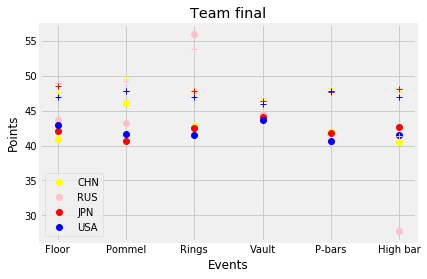

In [10]:
#plotting nations score
plt.plot(x_axis, chn, marker = 'o', linewidth = 0, color = 'yellow', label = "CHN")
plt.plot(x_axis, rus, marker = 'o', linewidth = 0, color = 'pink', label = "RUS")
plt.plot(x_axis, jpn, marker = 'o', linewidth = 0, color = 'red', label = "JPN")
plt.plot(x_axis, usa, marker = 'o', linewidth = 0, color = 'blue', label = "USA")
#plotting nations score if each nation had perfect rountines
plt.plot(x_axis, chn_top, marker = '+', linewidth = 0, color = 'yellow', label= "CHN Top")
plt.plot(x_axis, rus_top, marker = '+', linewidth = 0, color = 'pink', label = "RUS top")
plt.plot(x_axis, jpn_top, marker = '+', linewidth = 0, color = 'red', label = "JPN Top")
plt.plot(x_axis, usa_top, marker = '+', linewidth = 0, color = 'blue', label = "USA Top")
#plotting
plt.title("Team final")
plt.xlabel("Events")
plt.ylabel("Points")
plt.legend(["CHN", "RUS", "JPN", "USA"], loc="best")
plt.savefig("C:/Users/laure/Desktop/Project 2/images/team.png")
plt.show()